In [1]:
import numpy as np
from functools import reduce
from collections import namedtuple
from typing import List, Tuple, Union

MAXSIDE = 100
MAXAREA = 40 * 40
MAXPIXELS = 40 * 40 * 5

import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src', 'arclang')))
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from image import Image, Point

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
# from arclang.image import Image, Piece
from matplotlib.colors import ListedColormap, BoundaryNorm

def display_matrix(matrix):
    colors = [
        "#000000",  # black
        "#0074D9",  # blue
        "#FF4136",  # red
        "#2ECC40",  # green
        "#FFDC00",  # yellow
        "#AAAAAA",  # grey
        "#F012BE",  # fuchsia
        "#FF851B",  # orange
        "#7FDBFF",  # teal
        "#870C25",  # brown
    ]
    cmap = ListedColormap(colors)
    bounds = np.arange(-0.5, 10, 1)
    norm = BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    cax = ax.matshow(matrix.mask, cmap=cmap, norm=norm)
    ax.set_title("Matrix")

    fig.colorbar(
        cax, ax=ax, ticks=np.arange(0, 10), orientation="vertical"
    ).ax.set_yticklabels(
        [
            "Symbol 0",
            "Symbol 1",
            "Symbol 2",
            "Symbol 3",
            "Symbol 4",
            "Symbol 5",
            "Symbol 6",
            "Symbol 7",
            "Symbol 8",
            "Symbol 9",
        ]
    )

    plt.show()

In [3]:
img1 = Image(0, 0, 5, 5, [
            [1, 1, 0, 2, 2],
            [1, 1, 0, 2, 2],
            [0, 0, 0, 0, 0],
            [3, 3, 0, 4, 4],
            [3, 3, 0, 4, 4]
        ])
img2 = Image(0, 0, 5, 5, [
            [1, 1, 1, 1, 1],
            [1, 2, 2, 2, 1],
            [1, 2, 3, 2, 1],
            [1, 2, 2, 2, 1],
            [1, 1, 1, 1, 1]
        ])

In [4]:
img3 = Image(0, 0, 5, 5, [
            [1, 2, 0, 1, 2],
            [3, 4, 0, 3, 4],
            [0, 0, 0, 0, 0],
            [1, 2, 0, 1, 2],
            [3, 4, 0, 3, 4]
        ])

In [5]:
def count_components_dfs(self, r: int, c: int, visited: np.ndarray):
    visited[r, c] = True
    for nr in range(r - 1, r + 2):
        for nc in range(c - 1, c + 2):
            if 0 <= nr < self.h and 0 <= nc < self.w and self.mask[nr, nc] and not visited[nr, nc]:
                count_components_dfs(nr, nc, visited)

def count_components(self) -> int:
    visited = np.zeros((self.h, self.w), dtype=bool)
    ans = 0
    for i in range(self.h):
        for j in range(self.w):
            if self.mask[i, j] and not visited[i, j]:
                count_components_dfs(i, j, visited)
                ans += 1
    return ans

In [6]:
img = Image(0, 0, 3, 3, [[1, 0, 1], [0, 1, 0], [1, 0, 1]])
img.list_components()

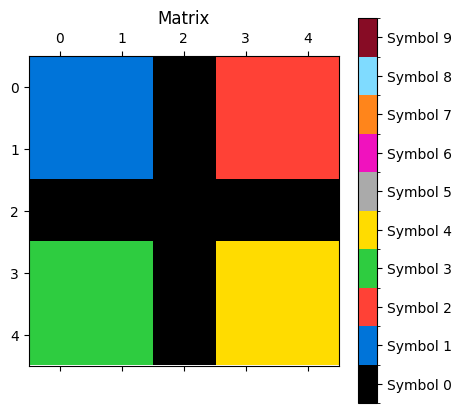

In [7]:
display_matrix(img1)

In [8]:
img1.__getitem__((1,1))

1

In [9]:
img1.safe(1,1),img1.safe(10,10)

(1, 0)

In [10]:
img1==img2

False

In [11]:
img1.col_mask()

31

In [12]:
img1.count_cols()

4

In [13]:
img1.count()

16

In [14]:
img1.count_components()

4

In [14]:
Image.is_rectangle(img1)

False

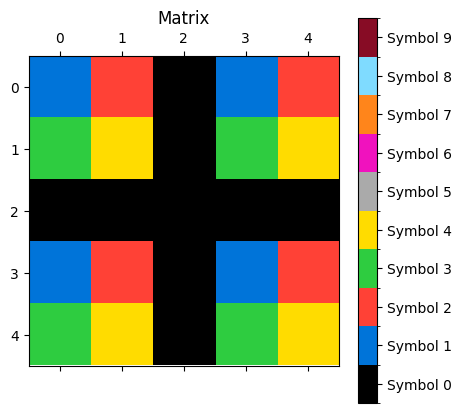

In [15]:
display_matrix(img3)

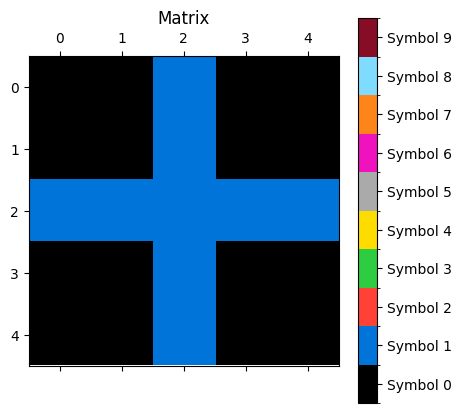

In [16]:
from function import *
display_matrix(heuristic_cut(img3))

In [17]:
img2.mask

array([[1, 1, 1, 1, 1],
       [1, 2, 2, 2, 1],
       [1, 2, 3, 2, 1],
       [1, 2, 2, 2, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

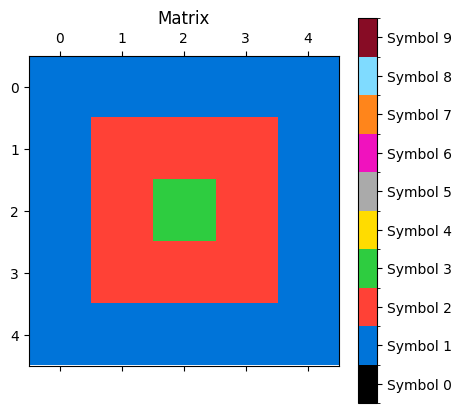

In [18]:
display_matrix(img2.list_components()[0])

In [21]:
img.aggressive_connected_components(0)

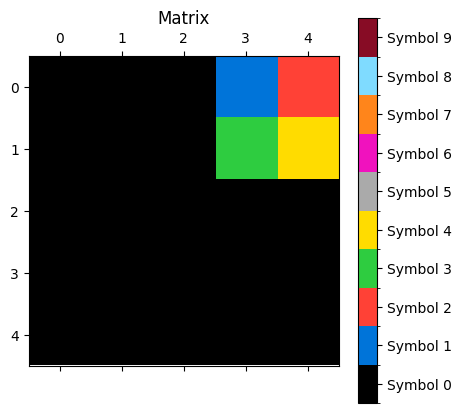

In [19]:
display_matrix(img3.list_components()[1])

In [16]:
Point(0,0)

Point(x=0, y=0)

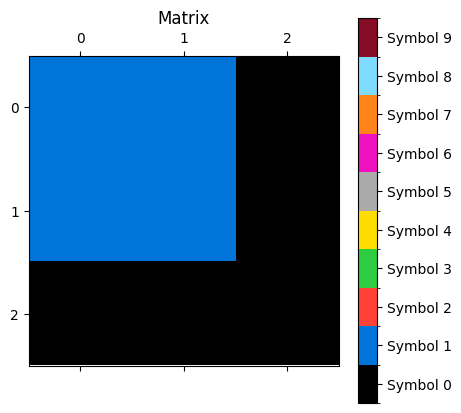

In [17]:
display_matrix(img1.sub_image(Point(0,0),Point(3,3)))

In [18]:
img1.split_cols()

[(<image.Image at 0x744e82e15760>, 1),
 (<image.Image at 0x744e82d4dd30>, 2),
 (<image.Image at 0x744e82d4e930>, 3),
 (<image.Image at 0x744e82d118e0>, 4)]

In [19]:
img2.split_cols()

[(<image.Image at 0x744e8b10e930>, 1),
 (<image.Image at 0x744e8b10e8d0>, 2),
 (<image.Image at 0x744e8b10e870>, 3)]

In [25]:
x= {"train": [{"input": [[0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5], [0, 0, 5, 5, 5, 0, 0, 5, 0, 0, 0, 5], [0, 0, 5, 0, 5, 0, 0, 5, 0, 0, 0, 5], [0, 0, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0], [0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0], [0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], "output": [[0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5], [0, 0, 0, 0, 0, 0, 0, 5, 8, 8, 8, 5], [0, 0, 5, 5, 5, 0, 0, 5, 8, 8, 8, 5], [0, 0, 5, 6, 5, 0, 0, 5, 8, 8, 8, 5], [0, 0, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0], [0, 0, 0, 0, 0, 0, 5, 7, 7, 5, 0, 0], [0, 0, 0, 0, 0, 0, 5, 7, 7, 5, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}, {"input": [[0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0], [0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0], [0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0], [0, 5, 5, 5, 0, 0, 5, 0, 0, 0, 5, 0], [0, 5, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0], [0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], "output": [[0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 5, 7, 7, 5, 0, 0, 0, 0, 0, 0, 0], [0, 5, 7, 7, 5, 0, 0, 0, 0, 0, 0, 0], [0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0], [0, 0, 0, 0, 0, 0, 5, 8, 8, 8, 5, 0], [0, 0, 0, 0, 0, 0, 5, 8, 8, 8, 5, 0], [0, 5, 5, 5, 0, 0, 5, 8, 8, 8, 5, 0], [0, 5, 6, 5, 0, 0, 5, 5, 5, 5, 5, 0], [0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}, {"input": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], "output": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 0, 0, 0, 0], [0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 7, 7, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 7, 7, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}], "test": [{"input": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0]], "output": [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 0, 0, 5, 6, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 7, 7, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 7, 7, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0]]}]}

In [95]:
mask_tr= np.array(x["train"][0]["input"])
mask_ts = np.array(x["train"][0]["output"])

In [96]:
img_test = Image(0,0,12,12,mask_ts)
img_train = Image(0,0,12,12,mask_tr)

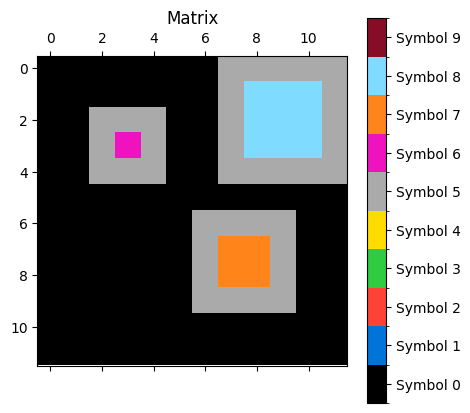

In [97]:
display_matrix(img_test)

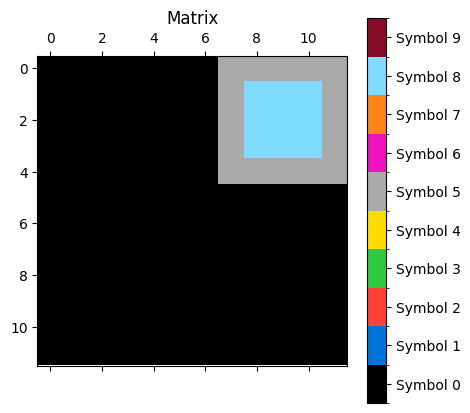

In [98]:
display_matrix(img_test.list_components()[0])

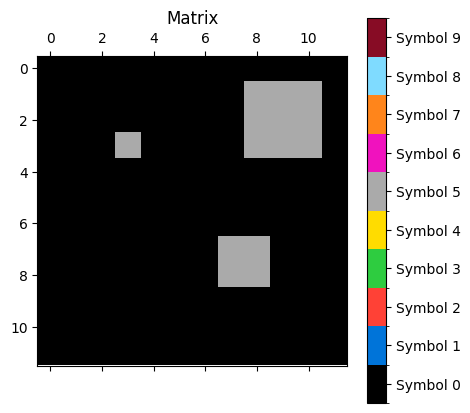

In [99]:
display_matrix(interior(img_train))

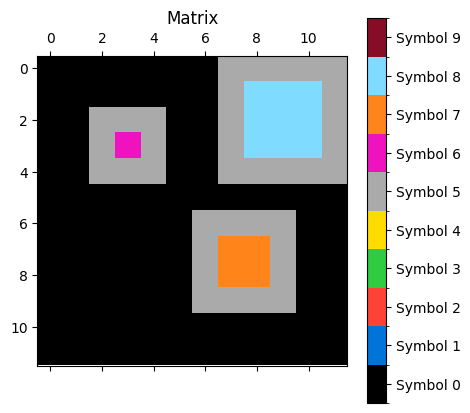

In [101]:
display_matrix(img_test)

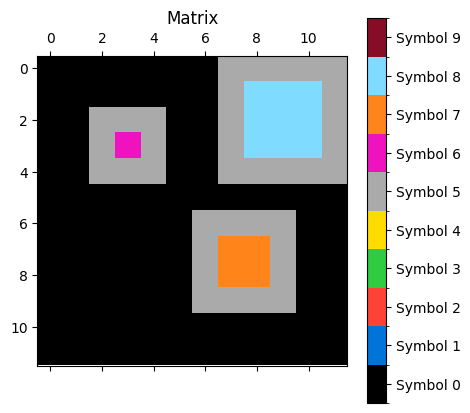

In [104]:
display_matrix(compose_id(replace_cols(interior(img_train),img_test),img_train,0))

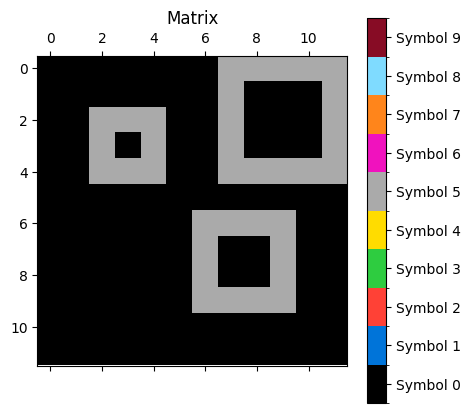

In [71]:
display_matrix(img_train)

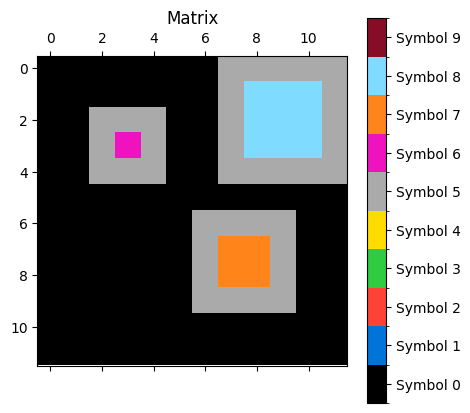

In [86]:
display_matrix(img_test)